# Word Representation in Biomedical Domain

Before you start, please make sure you have read this notebook. You are encouraged to follow the recommendations but you are also free to develop your own solution from scratch. 

## Marking Scheme

- Biomedical imaging project: 40%
    - 20%: accuracy of the final model on the test set
    - 20%: rationale of model design and final report
- Natural language processing project: 40%
    - 30%: completeness of the project
    - 10%: final report
- Presentation skills and team work: 20%


This project forms 40\% of the total score for summer school. The marking scheme of each part of this project is provided below with a cap of 100\%.

You are allowed to use open source libraries as long as the libraries are properly cited in the code and final report. The usage of third-party code without proper reference will be treated as plagiarism, which will not be tolerated.

You are encouraged to develop the algorithms by yourselves (without using third-party code as much as possible). We will factor such effort into the marking process.

## Setup and Prerequisites 

Recommended environment

- Python 3.7 or newer
- Free disk space: 100GB

Download the data

```sh
# navigate to the data folder
cd data

# download the data file
# which is also available at https://www.semanticscholar.org/cord19/download
wget https://ai2-semanticscholar-cord-19.s3-us-west-2.amazonaws.com/2021-07-26/document_parses.tar.gz

# decompress the file which may take several minutes
tar -xf document_parses.tar.gz

# which creates a folder named document_parses
```

## Part 1 (20%): Parse the Data

The JSON files are located in two sub-folders in `document_parses`. You will need to scan all JSON files and extract text (i.e. `string`) from relevant fields (e.g. body text, abstract, titles).

You are encouraged to extract full article text from body text if possible. If the hardware resource is limited, you can extract from abstract or titles as alternatives. 

Note: The number of JSON files is around 425k so it may take more than 10 minutes to parse all documents.

For more information about the dataset: https://www.semanticscholar.org/cord19/download

Recommended output:

- A list of text (`string`) extracted from JSON files.

In [ ]:
!pip install tokenizers
!pip install gensim
!pip install simpletransformers

In [ ]:
from tokenizers import Tokenizer
from tokenizers.models import BPE
from tokenizers.trainers import BpeTrainer
from tokenizers.pre_tokenizers import Whitespace

from gensim.test.utils import common_texts
from gensim.models import Word2Vec

import tensorflow as tf
import os
import json

from sklearn.decomposition import IncrementalPCA    # inital reduction
from sklearn.manifold import TSNE                   # final reduction
import numpy as np                                  # array handling
import matplotlib.pyplot as plt
import random

tokenizer = Tokenizer(BPE(unk_token="[UNK]"))
trainer = BpeTrainer(special_tokens=["[UNK]", "[CLS]", "[SEP]", "[PAD]", "[MASK]"])
tokenizer.pre_tokenizer = Whitespace()
filelist = []#保存文件夹中文件名
filelist_tol = []#记录所有文件名
data = []
g = os.walk(r"/content/pdf_json")  #遍历pdf_json文件夹，读取其中文件
for path,dir_list,file_list in g:  
    for file_name in file_list: 
        filelist.append(os.path.join(path,file_name))
        filelist_tol.append(os.path.join(path,file_name))
 
for file in filelist:  #将每篇论文的text部分加入data中
    with open(file,'r') as f:
        temdata = json.load(f)
        text = ""
        for part in temdata['body_text']:
            text = text + part['text']
        data.append(text)

filelist = []
g = os.walk(r"/content/pmc_json")  #遍历pmc_json文件夹，读取其中文件
for path,dir_list,file_list in g:  
    for file_name in file_list: 
        filelist.append(os.path.join(path,file_name))
        filelist_tol.append(os.path.join(path,file_name))
for file in filelist:  #将每篇论文的text部分加入data中
    with open(file,'r') as f:
        temdata = json.load(f)
        text = ""
        for part in temdata['body_text']:
            text = text + part['text']
        data.append(text)

## Part 2 (30%): Tokenization

Traverse the extracted text and segment the text into words (or tokens).

The following tracks can be developed in independentely. You are encouraged to divide the workload to each team member.

Recommended output:

- Tokenizer(s) that is able to tokenize any input text.

Note: Because of the computation complexity of tokenizers, it may take hours/days to process all documents. Which tokenizer is more efficient? Any idea to speedup?

### Track 2.1 (10%): Use split()

Use the standard `split()` by Python.
```
data_split = [] #记录分词完成的数据
for piece in data:
    if(len(piece)>0):
        data_split.append(piece.split())
        data.remove(piece)
print(data_split)
```

### Track 2.2 (10%): Use NLTK or SciSpaCy

NLTK tokenizer: https://www.nltk.org/api/nltk.tokenize.html

SciSpaCy: https://github.com/allenai/scispacy

Note: You may need to install NLTK and SpaCy so please refer to their websites for installation instructions.
```
data_split = []
for piece in data:
    if(len(piece)>0):
        data_split.append(sent_tokenize(piece))
        data.remove(piece)
print(data_split)
```


### Track 2.3 (10%): Use Byte-Pair Encoding (BPE)

Byte-Pair Encoding (BPE): https://huggingface.co/transformers/tokenizer_summary.html

Note: You may need to install Huggingface's transformers so please refer to its website for installation instructions.

```
data_split = [] #此过程需要提前安装NLTKpackage
files = filelist1
tokenizer.train(files, trainer)
 
for piece in data:
    if(len(piece)>0):
        output = tokenizer.encode(piece)
        data_split.append(output.tokens)
        data.remove(piece)
print(data_split[:3])
```

### Track 2.4 (Bonus +5%): Build new Byte-Pair Encoding (BPE)

This track may be dependent on track 2.3.

The above pre-built tokenization methods may not be suitable for biomedical domain as the words/tokens (e.g. diseases, sympotoms, chemicals, medications, phenotypes, genotypes etc.) can be very different from the words/tokens commonly used in daily life. Can you build and train a new BPE model for biomedical domain in particular?

### Open Question (Optional):

- What are the pros and cons of the above tokenizers?

In [ ]:
data_split = []
files = filelist1
tokenizer.train(files, trainer)
data_split_id=[]
for piece in data:
    if(len(piece)>0):
        data_split.append(piece.split())
        data.remove(piece)
print(data_split)




[['Infections', 'are', 'an', 'important', 'cause', 'of', 'morbidity,', 'mortality,', 'hospital', 'stay,', 'intensive', 'care', 'unit', 'admissions,', 'and', 'healthcare', 'cost', 'besides', 'healthcare', 'resource', 'utilization', 'in', 'the', 'setting', 'of', 'hematopoietic', 'stem', 'cell', 'transplantation', '(HSCT)', '(Ballen', 'et', 'al.', '2016;', 'Muennichow', 'et', 'al.', '2018', ').', 'Infections', 'can', 'occur', 'at', 'different', 'stages', 'of', 'HSCT', 'starting', 'from', 'pretransplant', 'conditioning', 'phase,', 'posttransplant', 'pre-engraftment,', 'posttransplant', 'post-engraftment,', 'early', 'posttransplant', 'phase', '(within', '100', 'days),', 'and', 'late', 'posttransplant', 'phase', '(after', '100', 'days).', 'The', 'characteristics', 'of', 'infections', '(bacterial,', 'viral,', 'fungal,', 'and', 'parasitic)', 'and', 'the', 'subsequent', 'consequence', 'are', 'dependent', 'on', 'the', 'immunity', 'of', 'host,', 'prophylaxis', 'provided,', 'and', 'other', 'cli

## Part 3 (30%): Build Word Representations

Build word representations for each extracted word. If the hardware resource is limited, you may limit the vocabulary size up to 10k words/tokens (or even smaller) and the dimension of representations up to 256.

The following tracks can be developed independently. You are encouraged to divide the workload to each team member.

### Track 3.1 (15%): Use N-gram Language Modeling

N-gram Language Modeling is to predict a target word by using `n` words from previous context. Specifically,

$P(w_i | w_{i-1}, w_{i-2}, ..., w_{i-n+1})$

For example, given a sentence, `"the main symptoms of COVID-19 are fever and cough"`, if $n=7$, we use previous context `["the", "main", "symptoms", "of", "COVID-19", "are"]` to predict the next word `"fever"`.

More to read: https://web.stanford.edu/~jurafsky/slp3/3.pdf

Recommended outputs:

- A fixed vector for each word/token.
```
model = FastText(sentences=data_split, vector_size=50, window=5, min_count=10, workers=4,sg = 1,negative=8) 
#需要提前安装gensim，利用其提供的FastText完成基于字母的ngram
```

### Track 3.2 (15%): Use Skip-gram with Negative Sampling

In skip-gram, we use a central word to predict its context. Specifically,

$P(w_{c-m}, ... w_{c-1}, w_{c+1}, ..., w_{c+m} | w_c)$

As the learning objective of skip-gram is computational inefficient (summation of entire vocabulary $|V|$), negative sampling is commonly applied to accelerate the training.

In negative sampling, we randomly select one word from the context as a positive sample, and randomly select $K$ words from the vocabulary as negative samples. As a result, the learning objective is updated to

$L = -\log\sigma(u^T_{t} v_c) - \sum_{k=1}^K\log\sigma(-u^T_k v_c)$, where $u_t$ is the vector embedding of positive sample from context, $u_k$ are the vector embeddings of negative samples, $v_c$ is the vector embedding of the central word, $\sigma$ refers to the sigmoid function.

More to read http://web.stanford.edu/class/cs224n/readings/cs224n-2019-notes01-wordvecs1.pdf section 4.3 and 4.4

Recommended outputs:

- A fixed vector for each word/token.
```
model = Word2Vec(sentences=data_split, vector_size=50, window=5, min_count=10, workers=4,sg = 1,negative=8) 
#需要提前安装gensim，利用其提供的skip-gram接口
```

### Track 3.3 (Bonus +5%): Use Contextualised Word Representation by Masked Language Model (MLM)

BERT introduces a new language model for pre-training named Masked Language Model (MLM). The advantage of MLM is that the word representations by MLM will be contextualised.

For example, "stick" may have different meanings in different context. By N-gram language modeling and word2vec (skip-gram, CBOW), the word representation of "stick" is fixed regardless of its context. However, MLM will learn the representation of "stick" dynamatically based on context. In other words, "stick" will have different representations in different context by MLM.

More to read: http://jalammar.github.io/illustrated-bert/ and https://arxiv.org/pdf/1810.04805.pdf
```
from simpletransformers.language_representation import RepresentationModel
model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=False
    )
word_vectors = model.encode_sentences(data, combine_strategy=None)# extra 5 points
```
Recommended outputs:

- An algorithm that is able to generate contextualised representation in real time.

In [ ]:
'''
model = Word2Vec(sentences=data_split, vector_size=50, window=5, min_count=10, workers=4,sg = 1,negative=8)
from gensim.models.fasttext import FastText
from gensim.test.utils import datapath
#model = FastText(sentences=data_split, vector_size=50, window=5, min_count=10, workers=4,sg = 1,negative=8)
sims = model.wv.most_similar('COVID-19')
print(sims)
'''
from simpletransformers.language_representation import RepresentationModel
model = RepresentationModel(
        model_type="bert",
        model_name="bert-base-uncased",
        use_cuda=False
    )
word_vectors = model.encode_sentences(data, combine_strategy=None)


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTextRepresentation: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing BertForTextRepresentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTextRepresentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
word_vectors[0][0]

## Part 4 (20%): Explore the Word Representations

The following tracks can be finished independently. You are encouraged to divide workload to each team member.

### Track 4.1 (5%): Visualise the word representations by t-SNE

t-SNE is an algorithm to reduce dimentionality and commonly used to visualise high-dimension vectors. Use t-SNE to visualise the word representations. You may visualise up to 1000 words as t-SNE is highly computationally complex.

More about t-SNE: https://lvdmaaten.github.io/tsne/

Recommende output:

- A diagram by t-SNE based on representations of up to 1000 words.

### Track 4.2 (5%): Visualise the Word Representations of Biomedical Entities by t-SNE(TODO)

Instead of visualising the word representations of the entire vocabulary (or 1000 words that are selected at random), visualise the word representations of words which are biomedical entities. For example, fever, cough, diabetes etc. Based on the category of those biomedical entities, can you assign different colours to the entities and see if the entities from the same category can be clustered by t-SNE? For example, sinusitis and cough are both respirtory diseases so they should be assigned with the same colour and ideally their representations should be close to each other by t-SNE. Another example, Alzheimer and headache are neuralogical diseases which should be assigned by another colour.

Examples of biomedial ontology: https://www.ebi.ac.uk/ols/ontologies/hp and https://en.wikipedia.org/wiki/International_Classification_of_Diseases

Recommende output:

- A diagram with colours by t-SNE based on representations of biomedical entities.

### Track 4.3 (5%): Co-occurrence (TODO)

- What are the biomedical entities which frequently co-occur with COVID-19 (or coronavirus)?

Recommended outputs:

- A sorted list of biomedical entities and description on how the entities are selected and sorted.

### Track 4.4 (5%): Semantic Similarity(TODO)

- What are the biomedical entities which have closest semantic similarity COVID-19 (or coronavirus) based on word representations?

Recommended outputs:

- A sorted list of biomedical entities and description on how the entities are selected and sorted.

### Open Question (Optional): What else can you discover?


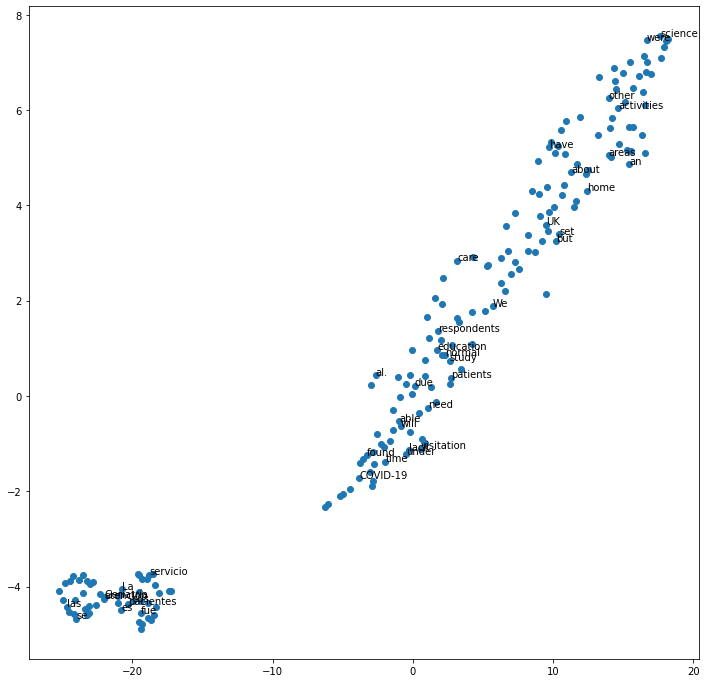

In [ ]:
#4.1

def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the first 200 words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors[:200])
    labels = np.asarray(model.wv.index_to_key[:200])  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):

    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    # Label randomly subsampled 100 data points

    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 40)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))
x_vals, y_vals, labels = reduce_dimensions(model)

plot_with_matplotlib(x_vals, y_vals, labels)
plt.show()
#4.2

#4.3
sims = model.wv.most_similar('COVID-19')#此时是利用上面Model的结果，包含所有与COVID-19相近的单词
                                                                    #，实际应只在生物医学实体的范围内进行

#4.4


## Part 5 (Bonus +10%): Open Challenge: Mining Biomedical Knowledge

A fundamental task in clinical/biomedical natural language processing is to extract intelligence from biomedical text corpus automatically and efficiently. More specifically, the intelligence may include biomedical entities mentioned in text, relations between biomedical entities, clinical features of patients, progression of diseases, all of which can be used to predict, understand and improve patients' outcomes. 

This open challenge is to build a biomedical knowledge graph based on the CORD-19 dataset and mine useful information from it. We recommend the following steps but you are also encouraged to develop your solution from scratch.

### Extract Biomedical Entities from Text

Extract biomedical entities (such as fever, cough, headache, lung cancer, heart attack) from text. Note that:

- The biomedical entities may consist of multiple words. For example, heart attack, multiple myeloma etc.
- The biomedical entities may be written in synoynms. For example, low blood pressure for hypotension.
- The biomedical entities may be written in different forms. For example, smoking, smokes, smoked.

### Extract Relations between Biomedical Entities

Extract relations between biomedical entities based on their appearance in text. You may define a relation between biomedical entities by one or more of the following criteria:

- The biomedical entities frequentely co-occuer together.
- The biomedical entities have similar word representations.
- The biomedical entities have clear relations based on textual narratives. For example, "The most common symptoms for COVID-19 are fever and cough" so we know there are relations between "COVID-19", "fever" and "cough".

### Build a Biomedical Knowledge Graph of COVID-19

Build a knoweledge graph based on the results from track 5.1 and 5.2 and visualise it.

In [ ]:
###################
# TODO: add your solution

###################